In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

%matplotlib inline

In [2]:
police_calls = pd.read_csv('../data/police_calls_2018.csv')

In [3]:
police_calls.head(5)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


In [4]:
police_calls.tail(3)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
718018,PD201800855208,08/29/2018 09:11:36 AM,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,3T73,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD
718019,PD201800783912,08/08/2018 10:15:20 AM,0,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,0.0,HIGHWAY 70&CHEATHAM CO LINE,NaN,W,25,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM
718020,PD201800800491,08/13/2018 11:51:29 AM,20180693242,A,96,Business Check,4,ASSISTED CITIZEN,0.0,HIGHWAY 70&CHEATHAM CO LINE,5252,W,23,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM


In [5]:
police_calls.shape

(718021, 18)

In [6]:
police_calls.columns

Index(['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode',
       'Tencode Description', 'Disposition Code', 'Disposition Description',
       'Block', 'Street Name', 'Unit Dispatched', 'Sector', 'Zone', 'Latitude',
       'Longitude', 'geometry', 'zipcode', 'PO'],
      dtype='object')

In [7]:
police_calls = police_calls.drop(columns = ['Event Number', 'Complaint Number', 'Block', 'Street Name', 'geometry'])

In [8]:
police_calls = police_calls.rename(columns = {
    'Call Received': 'call_time', 
    'Shift': 'shift', 
    'Tencode': 'tencode',
    'Tencode Description': 'tencode_desc', 
    'Disposition Code': 'disposition',
    'Disposition Description': 'disposition_desc',
    'Unit Dispatched': 'unit_dispatched', 
    'Sector': 'sector', 
    'Zone': 'zone',
    'Latitude': 'lat',
    "Longitude": 'lng',
    "zipcode": 'zipcode',
    'PO': 'po'
})

In [9]:
police_calls['disposition_desc'].unique()

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'DISREGARD / SIGNAL 9',
       'M.P.D. REPORT COMPLED', 'ADVISED IN CIVIL CASE', 'FALSE CALL',
       'NO RESPONSE', 'ARREST, CUSTODIAL OR CITATION',
       'ASSISTANCE REFUSED', 'ADVISORY / NOTICE FORM GIVEN', nan],
      dtype=object)

In [10]:
police_calls = police_calls.loc[~police_calls.disposition_desc.isin(['DISREGARD / SIGNAL 9', 'NO RESPONSE'])]
#police_calls = plice_calls[police_calls.disposition_desc.notnull()]  THIS OUTPUTS THE SAME AS THE BELOW
police_calls = police_calls.dropna(subset=['disposition_desc'])

In [11]:
police_calls['disposition_desc'].unique()

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'M.P.D. REPORT COMPLED',
       'ADVISED IN CIVIL CASE', 'FALSE CALL',
       'ARREST, CUSTODIAL OR CITATION', 'ASSISTANCE REFUSED',
       'ADVISORY / NOTICE FORM GIVEN'], dtype=object)

In [12]:
police_calls.shape

(624841, 13)

In [13]:
tencode_counts = police_calls['tencode_desc'].value_counts()
type(tencode_counts)

pandas.core.series.Series

In [14]:
tencode_counts.index

Index(['Business Check', 'Traffic Violation',
       'Want Officer for Investigation / Assistance',
       'Administrative/Special Assignment', 'Community Policing Activity',
       'Suspicious Person', 'Disorderly Person',
       'Vehicle Accident - Property Damage', 'Safety Hazard', 'Theft',
       'Burglary - Non-Residence', 'Burglary - Residence',
       'Vehicle Blocking Right of Way', 'Investigate 911 Hang-Up Call',
       'Vehicle Accident - Personal Injury', 'Fight / Assault', 'Fixed Post',
       'Meal Break', 'Shots Fired', 'Transport Prisoner / Suspect',
       'Intoxicated Person', 'Missing Person', 'Dangerous / Injured Animal',
       'Suicidal Person', 'Person with Weapon', 'Holdup / Robbery',
       'Person Indecently Exposed', 'Escort / Convoy', 'Person Screaming',
       'Prowler', 'Mentally ILL Person', 'Fire', 'Personal Relief',
       'Corpse / D. O. A.', 'Shooting', 'Hazardous Liquid / Gas Leak',
       'Kidnapping', 'Cutting / Stabbing', 'Gang Activity', 'Explosio

In [15]:
tencode_counts = tencode_counts.reset_index()
tencode_counts.head()

,index,tencode_desc
0,Business Check,154763
1,Traffic Violation,141283
2,Want Officer for Investigation / Assistance,100465
3,Administrative/Special Assignment,34094
4,Community Policing Activity,34001


In [16]:
tencode_counts.columns = ["tencode", "tencode count"]

In [17]:
tencode_counts.head()

,tencode,tencode count
0,Business Check,154763
1,Traffic Violation,141283
2,Want Officer for Investigation / Assistance,100465
3,Administrative/Special Assignment,34094
4,Community Policing Activity,34001


Text(0.5, 1.0, 'Tencodes')

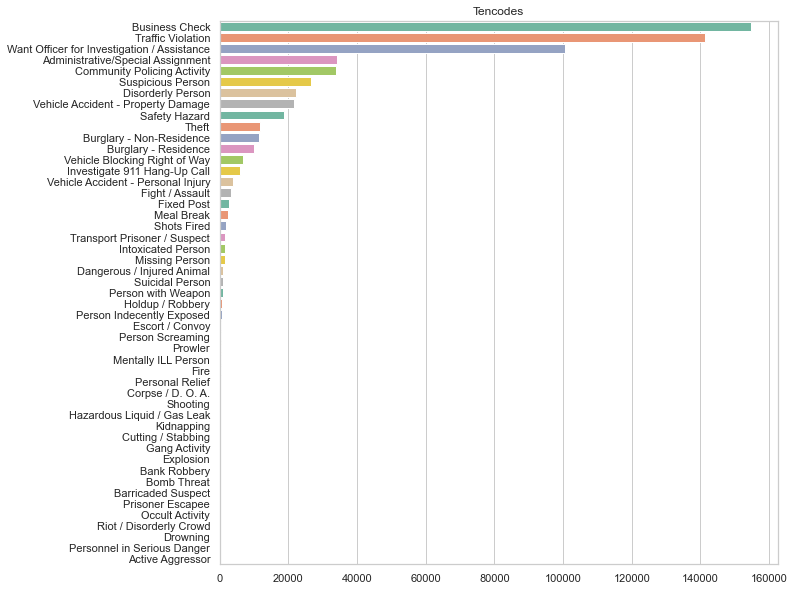

In [18]:
plt.figure(figsize = (10, 10))                               # Increase the plot size to 10 x 10
sns.set(style="whitegrid")                                  # Change the plot style
sns.barplot(x = 'tencode count', 
            y = 'tencode', 
            data = tencode_counts, 
            palette = 'Set2')
plt.xlabel('')                                              # Remove the x-axis label
plt.ylabel('')                                              # Remove the y-axis label
plt.title('Tencodes')

In [19]:
police_calls.columns

Index(['call_time', 'shift', 'tencode', 'tencode_desc', 'disposition',
       'disposition_desc', 'unit_dispatched', 'sector', 'zone', 'lat', 'lng',
       'zipcode', 'po'],
      dtype='object')

In [20]:
zipcode_calls = police_calls['zipcode'].value_counts().reset_index()
zipcode_calls.index

RangeIndex(start=0, stop=38, step=1)

In [21]:
zipcode_calls.columns = ['zipcode', 'call_count']
zipcode_calls.head()

,zipcode,call_count
0,37203,61962
1,37209,52248
2,37207,48750
3,37211,47528
4,37115,39879


In [22]:
zipcode_calls['zipcode'] = zipcode_calls['zipcode'].astype(str)

Text(0.5, 1.0, 'Calls By Zipcode')

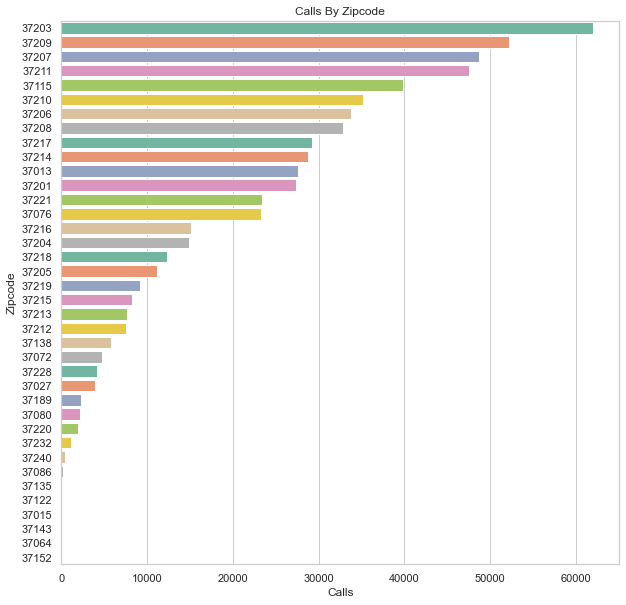

In [23]:
plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
sns.barplot(x = 'call_count', 
            y = 'zipcode', 
            data = zipcode_calls, 
            palette = 'Set2')
plt.xlabel('Calls')
plt.ylabel('Zipcode')
plt.title('Calls By Zipcode')

In [24]:
police_calls['tencode_desc'].unique()

array(['Traffic Violation', 'Administrative/Special Assignment',
       'Safety Hazard', 'Want Officer for Investigation / Assistance',
       'Community Policing Activity', 'Vehicle Blocking Right of Way',
       'Mentally ILL Person', 'Burglary - Residence', 'Fight / Assault',
       'Vehicle Accident - Property Damage', 'Business Check',
       'Burglary - Non-Residence', 'Disorderly Person', 'Theft',
       'Shots Fired', 'Suspicious Person',
       'Vehicle Accident - Personal Injury',
       'Investigate 911 Hang-Up Call', 'Personal Relief',
       'Transport Prisoner / Suspect', 'Missing Person', 'Fixed Post',
       'Intoxicated Person', 'Meal Break', 'Dangerous / Injured Animal',
       'Corpse / D. O. A.', 'Person with Weapon',
       'Hazardous Liquid / Gas Leak', 'Occult Activity', 'Prowler',
       'Gang Activity', 'Holdup / Robbery', 'Suicidal Person',
       'Person Screaming', 'Person Indecently Exposed', 'Shooting',
       'Bank Robbery', 'Fire', 'Kidnapping', 'Cutting

10. The Metro Council is interested in the effect of community policing activities. For which zip codes do calls for “Community Policing Activity” most frequently occur? How do these zip codes compare to what you see when looking at the overall counts by zip code?

In [25]:
police_calls['zipcode'] = police_calls['zipcode'].astype(str)
community = police_calls[police_calls['tencode_desc']=='Community Policing Activity']

In [26]:
community = community['zipcode'].value_counts().reset_index()

In [27]:
community.columns = ['Zipcode', 'Call_Counts']

In [28]:
community.head()

,Zipcode,Call_Counts
0,37209,6456
1,37203,3920
2,37221,2993
3,37201,2056
4,37206,1895


Text(0.5, 1.0, 'Community Policing Calls By Zipcode')

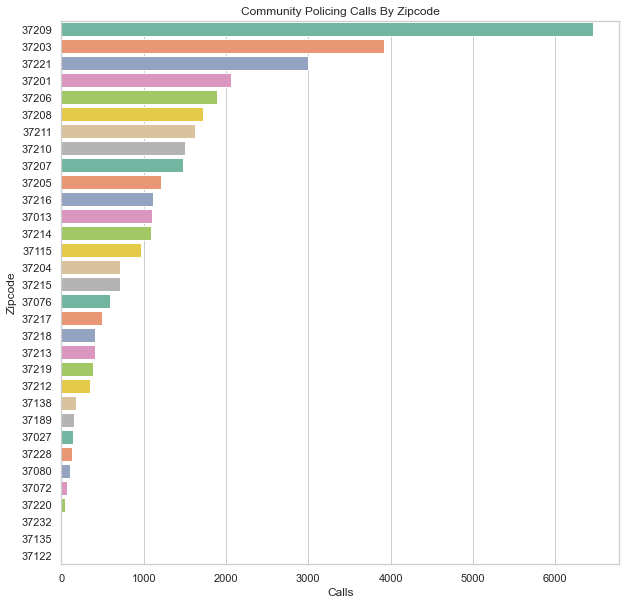

In [29]:
plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
sns.barplot(x = 'Call_Counts', 
            y = 'Zipcode', 
            data = community, 
            palette = 'Set2')
plt.xlabel('Calls')
plt.ylabel('Zipcode')
plt.title('Community Policing Calls By Zipcode')

Convert the call_time column in police_calls to a pandas datetime. You’ll likely want to specify the format argument in order to speed up execution. Create a new column in police_calls to show the month that a call for service occurred. In which month(s) did most calls occur? What do you notice about the months for which data is provided?

In [30]:
police_calls['call_time'] = pd.to_datetime(police_calls['call_time'], 
                                            format = '%m/%d/%Y %I:%M:%S %p')

In [31]:
police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,2018-02-16 19:09:00,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,2018-02-16 20:02:00,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,2018-02-16 22:16:00,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE
3,2018-02-16 17:58:00,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE
4,2018-02-16 16:19:00,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE


In [32]:
police_calls['month'] = police_calls['call_time'].dt.month

<AxesSubplot:>

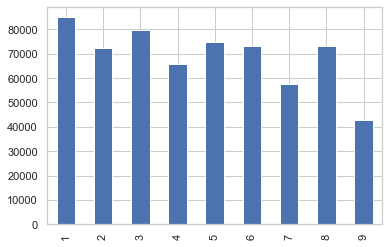

In [33]:
month_calls = police_calls['month'].value_counts().sort_index().plot(kind = 'bar');
month_calls

In [34]:
police_calls['call_time'].max()

Timestamp('2018-09-21 03:13:24')

In [35]:
police_calls['day'] = police_calls['call_time'].dt.weekday

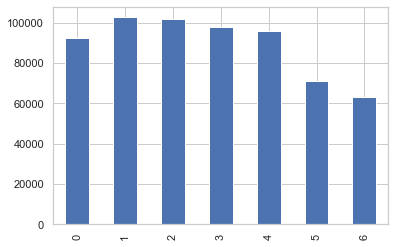

In [36]:
day_calls = police_calls['day'].value_counts().sort_index().plot(kind = 'bar');

_______________________
WEEK TWO STARTS HERE
_______________________

In [37]:
hub = pd.read_csv('../data/hubNashville_2018.csv')
hub.columns

Index(['Request #', 'Status', 'Request Type', 'Subrequest Type',
       'Additional Subrequest Type', 'Date / Time Opened',
       'Date / Time Closed', 'Request Origin', 'Zipcode', 'Latitude',
       'Longitude'],
      dtype='object')

In [38]:
hub = hub.rename(columns = {
    'Request #': 'request_id',
    'Status': 'status',
    'Request Type': 'request_type',
    'Subrequest Type': 'subrequest_type',
    'Additional Subrequest Type': 'add_subrequest_type',
    'Date / Time Opened': 'opened',
    'Date / Time Closed': 'closed',
    'Request Origin': 'origin',
    'Zipcode': 'zipcode',
    'Latitude': 'lat',
    'Longitude': 'lng'})
hub.head(2)

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513


15. Drop the rows from hub where closed is missing. You should end up with 80,866 rows Then create a new column, resolution_time that calculates how long the request was open. You’ll need to convert opened and closed to pandas datetimes before calculating the time delta.

In [39]:
hub = hub.dropna(subset=['closed'])
hub.shape

(80866, 11)

In [40]:
opened = pd.to_datetime(hub['opened'])
closed = pd.to_datetime(hub['closed'])
hub['resolution_time'] = closed - opened

Were any requests open for longer than a year? How many? What request type was most commonly open for more than a year? Save the requests that were open for longer than a year to a DataFrame named slow_to_resolve.

In [41]:
request_lengths = hub['resolution_time'].value_counts().sort_index()
request_lengths = request_lengths.reset_index()
request_lengths.columns = ['resolution_time', 'count']

In [42]:
slow_to_resolve = hub[hub['resolution_time'] > pd.Timedelta('365 days 00:00:00')]
#open longer than one year:
slow_to_resolve.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time
244,112161,Closed,Property Violations,Residential Complaint,Residential Complaint,2018-10-25 18:28:49,03/18/2020 08:12:19 AM,hubNashville Community,37115.0,36.258170,-86.695750,509 days 13:43:30
250,123468,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2018-12-14 13:12:04,06/29/2020 02:41:39 PM,Phone,37207.0,36.245086,-86.773350,563 days 01:29:35
427,48380,Closed,"Streets, Roads & Sidewalks",Dip/Bump in Roadway,Dip/Bump in Roadway,2018-02-22 16:38:31,12/30/2019 04:59:17 PM,hubNashville Community,37221.0,36.062642,-86.972435,676 days 00:20:46
522,117153,Closed,Other,Other,Other,2018-11-16 03:45:14,01/17/2020 08:39:58 PM,hubNashville Community,37115.0,36.243802,-86.717873,427 days 16:54:44
577,84291,Closed,Property Violations,Cars Parked on Lawn,Cars Parked on Lawn,2018-07-19 18:50:09,05/08/2020 07:10:49 AM,hubNashville Community,37211.0,36.127623,-86.757789,658 days 12:20:40


In [43]:
#Most common types open for more than one year:
slow_to_resolve['request_type'].value_counts()

Streets, Roads & Sidewalks    159
Property Violations            73
Public Safety                  14
Other                          14
Electric & Water General       10
Trash, Recycling & Litter       9
Education & Libraries           5
Social Services & Housing       2
Planning & Zoning               2
Name: request_type, dtype: int64

In [44]:
hub['resolution_time_hours'] = hub['resolution_time'] / pd.Timedelta(hours=1)
hub

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time,resolution_time_hours
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162,0 days 01:47:54,1.798333
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513,0 days 01:48:52,1.814444
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,02/07/2018 05:04:33 PM,Phone,37076.0,36.187902,-86.607286,4 days 19:46:18,115.771667
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,02/27/2018 09:06:16 PM,hubNashville Community,37203.0,36.153761,-86.788745,3 days 21:39:09,93.652500
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,02/08/2018 03:01:50 PM,Phone,37210.0,36.154836,-86.763345,0 days 01:01:46,1.029444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81046,38380,Closed,"Trash, Recycling & Litter",Extra Cart Pickup Request,Extra Recycle Cart Pickup,2018-01-11 14:37:00,01/27/2018 11:00:00 AM,Phone,37212.0,36.134800,-86.800880,15 days 20:23:00,380.383333
81047,39406,Closed,"Streets, Roads & Sidewalks",Snow and Ice Removal,Snow and Ice Removal,2018-01-17 14:29:12,01/17/2018 09:05:07 PM,hubNashville Community,37013.0,36.035460,-86.638371,0 days 06:35:55,6.598611
81048,39538,Closed,"Streets, Roads & Sidewalks",Snow and Ice Removal,Snow and Ice Removal,2018-01-17 17:05:54,01/17/2018 09:05:13 PM,Phone,37207.0,36.201120,-86.760162,0 days 03:59:19,3.988611
81072,106123,Closed,Property Violations,Tall Grass and Weeds,Tall Grass and Weeds,2018-10-04 15:01:55,02/27/2019 06:55:35 PM,hubNashville Community,37207.0,36.181081,-86.770350,146 days 03:53:40,3507.894444


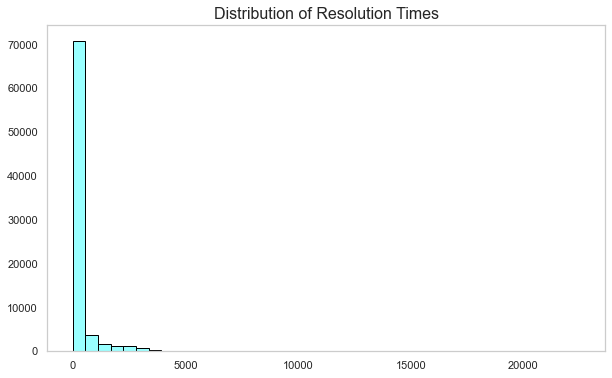

In [45]:
hub['resolution_time_hours'].hist(bins = 40,
                            color = '#99FFFF',
                            edgecolor = 'black',
                            figsize = (10,6),
                            grid = False)


plt.title('Distribution of Resolution Times', fontsize = 16);

In [46]:
hub['resolution_time'].describe()

count                         80866
mean     14 days 16:05:55.696287685
std      43 days 06:11:36.353865900
min                 0 days 00:00:00
25%          1 days 01:58:26.250000
50%                 3 days 01:16:19
75%                 8 days 11:32:00
max               938 days 02:22:16
Name: resolution_time, dtype: object

19. Calculate the median resolution time (in hours) by zipcode for requests of type “Streets, Roads & Sidewalks”. We are using median time since the distribution of resolution times is highly skewed. Save the results as a dataframe called streets_median with column names zipcode and median_resolution_time.

In [47]:
hub['zipcode'] = hub['zipcode'].astype(int).astype(str)
streets_median = hub[hub['request_type']=='Streets, Roads & Sidewalks']
streets_median = pd.DataFrame(hub, columns=['zipcode', 'resolution_time_hours'])
streets_median = streets_median.groupby('zipcode').mean().reset_index()
streets_median.head()

,zipcode,resolution_time_hours
0,0,213.366667
1,37013,339.197205
2,37015,850.238620
3,37027,218.626717
4,37064,450.429784


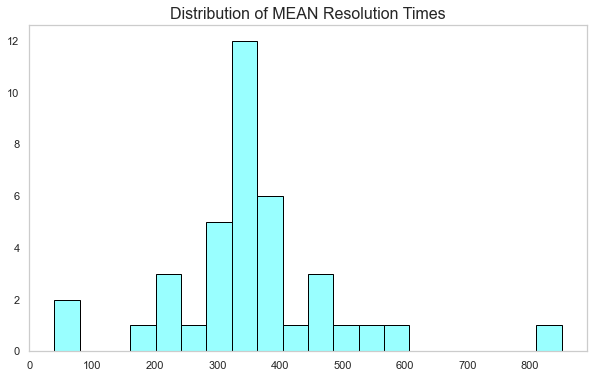

In [48]:
streets_median.hist(bins = 20,
                            color = '#99FFFF',
                            edgecolor = 'black',
                            figsize = (10,6),
                            grid = False)


plt.title('Distribution of MEAN Resolution Times', fontsize = 16);

20. Create a connection to the survey data (metro_survey.db) and then create a cursor in order to find all the available tables in the database. They should match the tables shown on the metro_survey_ERD diagram.

In [49]:
import sqlite3 as sql
conn = sql.connect('../data/metro_survey.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")

available_tables = (cur.fetchall())

available_tables

[('codes',),
 ('equality_and_access',),
 ('general_services',),
 ('info',),
 ('overall',),
 ('recreation',),
 ('safety',),
 ('transportation',)]

21. a. The safety table has survey results that pertain to fire and police service, and the info table has zip code and other information for survey respondents. Write a SQL SELECT statement to join the two tables on Id and load them to a single pandas DataFrame (safety_exp).

In [50]:
query = '''
SELECT *
FROM info
JOIN safety
ON info.id = safety.id;
'''

safety_exp = pd.read_sql(query, conn)
safety_exp

,Id,Period,Date,ZIP Code,Quality of Life,Overall Feeling of Safety,Neighborhood Safety,Neighborhood Appearance,Nashville as Residence,Nashville as Place to Raise Children,...,Police Professionalism,Police Response Time,Fire Services,Fire Response Time,Emergency Medical Services (EMS),EMS Response Time,Fire Professionalism,EMS Professionalism,911 Services,Non-Emergency Number
0,1,2018Q2,07/16/2018,37208,Neutral,Neutral,Neutral,Satisfied,Neutral,Good,...,Neutral,Dissatisfied,Neutral,Very Satisfied,Satisfied,Satisfied,Neutral,Neutral,Very Satisfied,Satisfied
1,2,2018Q2,07/16/2018,37211,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,...,Satisfied,Don't Know,Satisfied,Don't Know,Don't Know,Don't Know,Very Satisfied,Very Satisfied,Don't Know,Don't Know
2,3,2018Q2,07/16/2018,37208,Very Satisfied,Neutral,Satisfied,Satisfied,Excellent,Excellent,...,Neutral,Satisfied,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know
3,4,2018Q2,07/16/2018,37203,Satisfied,Very Satisfied,Satisfied,Satisfied,Excellent,Don't Know,...,Very Satisfied,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know
4,5,2018Q1,03/06/2018,37138,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,...,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Satisfied,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,2167,2019Q1,03/22/2019,37203,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,...,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know
2167,2168,2019Q1,03/22/2019,37027,Satisfied,Dissatisfied,Satisfied,Very Satisfied,Good,Good,...,Satisfied,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Don't Know,Don't Know
2168,2169,2019Q1,03/22/2019,37209,Satisfied,Satisfied,Satisfied,Satisfied,Good,Good,...,Satisfied,Neutral,Neutral,Neutral,Neutral,Neutral,Satisfied,Neutral,Satisfied,Neutral
2169,2170,2019Q1,03/22/2019,37217,Neutral,Satisfied,Satisfied,Dissatisfied,Good,Good,...,Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied


21. b. Slice safety_exp to get the ZIP Code, and 'Police - Overall', columns. It’s fine to save it back to the safety_exp variable.

In [51]:
safety_exp = pd.read_sql(query, conn)
safety_exp.shape

(2171, 29)

In [52]:
safety_exp = safety_exp[['ZIP Code', 'Police - Overall']]
safety_exp.head()

,ZIP Code,Police - Overall
0,37208,Very Dissatisfied
1,37211,Satisfied
2,37208,Neutral
3,37203,Very Satisfied
4,37138,Neutral


21. c. Create a new DataFrame, safety_total which contains the total number of responses per zip code. Name the columns of this DataFrame zipcode and total_responses.

In [53]:
safety_total = safety_exp['ZIP Code'].value_counts().reset_index()
safety_total.columns = ['zipcode', 'total_responses']
safety_total.head()

,zipcode,total_responses
0,37207,226
1,37211,190
2,37013,180
3,37221,141
4,37208,121


21. d. Filter safety_exp down to rows where the “Police - Overall” column is equal to “Dissatisfied” or “Very Dissatisfied”. Then count the number of rows per zipcode. Save this to a DataFrame name safety_dissatisfied with columns named zipcode and total_dissatisfied.

In [54]:
safety_dissatisfied = safety_exp.loc[safety_exp['Police - Overall'].isin(['Dissatisfied', 'Very Dissatisfied'])]['ZIP Code'].value_counts().reset_index()
safety_dissatisfied.columns = ['zipcode', 'total_dissatisfied']
safety_dissatisfied.head()

,zipcode,total_dissatisfied
0,37207,48
1,37013,36
2,37211,26
3,37208,22
4,37218,22


21. e. Create a new dataframe, safety_by_zip by merging safety_dissatisfied and safety_total. Be sure to keep all zip codes in the result. You may want to fill in missing values with 0.

In [55]:
safety_by_zip = pd.merge(left = safety_dissatisfied, right = safety_total, how= 'right').fillna(0)

In [56]:
safety_dissatisfied.nunique()

zipcode               28
total_dissatisfied    16
dtype: int64

21. f. Finally, create a pct_dissatisfied column by dividing the total_dissatisfied by total_responses and multiplying the result by 100.

In [57]:
safety_by_zip['pct_dissatisfied'] = 100 * safety_by_zip['total_dissatisfied'] / safety_by_zip['total_responses']

In [58]:
safety_by_zip.head(10)

,zipcode,total_dissatisfied,total_responses,pct_dissatisfied
0,37207,48.0,226,21.238938
1,37211,26.0,190,13.684211
2,37013,36.0,180,20.000000
3,37221,12.0,141,8.510638
4,37208,22.0,121,18.181818
5,37209,17.0,115,14.782609
6,37206,19.0,107,17.757009
7,37214,10.0,98,10.204082
8,37215,11.0,97,11.340206
9,37076,11.0,97,11.340206


21. g. How do the zip codes where people are dissatisfied with the police compare to those with a large amount of community policing activities?

In [59]:
total_police_calls = police_calls['zipcode'].value_counts().reset_index()
total_police_calls.columns = ['zipcode', 'total_calls']

In [60]:
cp_by_zip = police_calls[police_calls['tencode_desc'] == 'Community Policing Activity']['zipcode'].value_counts().reset_index()
cp_by_zip.columns = ['zipcode', 'community_policing_calls']

In [61]:
safety_by_zip = pd.merge(left = safety_by_zip, right = cp_by_zip, how= 'left')
safety_by_zip = pd.merge(left = safety_by_zip, right = total_police_calls, how='left').fillna(0)

safety_by_zip['cp_pct'] = 100 * safety_by_zip['community_policing_calls'] / safety_by_zip['total_calls']

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [62]:
safety_by_zip[safety_by_zip]

ValueError: Boolean array expected for the condition, not int64

22. Follow similar steps as the previous question but using the “Streets and Sidewalks - Overall” column from the general_services table. Does there seem to be any relationship between median response time by zip code and percentage of survey respondents who are either Dissatisfied or Very Dissatisfied? You will want to used the streets_median DataFrame that you created in question 19.


In [63]:
query = '''
SELECT *
FROM general_services JOIN info ON general_services.Id = info.Id;
'''

streets_exp = pd.read_sql(query, conn)
streets_exp.shape

(2171, 34)

In [64]:
streets_exp = streets_exp[['ZIP Code', 'Streets and Sidewalks - Overall']]
streets_exp.head()

,ZIP Code,Streets and Sidewalks - Overall
0,37208,Satisfied
1,37211,Dissatisfied
2,37208,Dissatisfied
3,37203,Satisfied
4,37138,Dissatisfied


In [65]:
streets_dissatisfied = streets_exp[streets_exp['Streets and Sidewalks - Overall'].isin(['Dissatisfied', 'Very Dissatisfied'])]['ZIP Code'].value_counts().reset_index()
streets_total = streets_exp['ZIP Code'].value_counts().reset_index()

streets_dissatisfied.columns = ['zipcode', 'num_dissatisfied']
streets_total.columns = ['zipcode', 'num_total']

streets_dissatisfied = pd.merge(left = streets_dissatisfied, right = streets_total, how = 'right').fillna(0)

streets_dissatisfied['pct_dissatisfied'] = 100*streets_dissatisfied['num_dissatisfied'] / streets_dissatisfied['num_total']

In [66]:
streets_dissatisfied = pd.merge(left = streets_dissatisfied, right = streets_median).sort_values('pct_dissatisfied')
streets_dissatisfied

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [67]:
import folium
nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start=12)

In [68]:
nash_map

In [72]:
slow_to_resolve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 244 to 81091
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   request_id           288 non-null    int64  
 1   status               288 non-null    object 
 2   request_type         288 non-null    object 
 3   subrequest_type      288 non-null    object 
 4   add_subrequest_type  287 non-null    object 
 5   opened               288 non-null    object 
 6   closed               288 non-null    object 
 7   origin               288 non-null    object 
 8   zipcode              288 non-null    float64
 9   lat                  288 non-null    float64
 10  lng                  288 non-null    float64
 11  resolution_time      288 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 29.2+ KB


In [76]:
for ind, row in slow_to_resolve.iterrows():
    point = [row['lat'], row['lng']]
    message = row['request_type'] +'\n' + row['resolution_time']
    folium.Marker(location = point, popup = message).add_to(nash_map)
    
nash_map